In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df2000= pd.read_csv("/content/atp_2000.csv")
df2001= pd.read_csv("/content/atp_2001.csv")
df2002= pd.read_csv("/content/atp_2002.csv")
df2003= pd.read_csv("/content/atp_2003.csv")
df2004= pd.read_csv("/content/atp_2004.csv")
df2005= pd.read_csv("/content/atp_2005.csv")
df2006= pd.read_csv("/content/atp_2006.csv")
df2007= pd.read_csv("/content/atp_2007.csv")
df2008= pd.read_csv("/content/atp_2008.csv")
df2009= pd.read_csv("/content/atp_2009.csv")
df2010= pd.read_csv("/content/atp_2010.csv")
df2011= pd.read_csv("/content/atp_2011.csv")
df2012= pd.read_csv("/content/atp_2012.csv")
df2013= pd.read_csv("/content/atp_2013.csv")
df2014= pd.read_csv("/content/atp_2014.csv")
df2015= pd.read_csv("/content/atp_2015.csv")
df2016= pd.read_csv("/content/atp_2016.csv")
df2017= pd.read_csv("/content/atp_2017.csv")
df2018= pd.read_csv("/content/atp_2018.csv")
df2019= pd.read_csv("/content/atp_2019.csv")
df2020= pd.read_csv("/content/atp_2020.csv")
df2021= pd.read_csv("/content/atp_2021.csv")
df2022= pd.read_csv("/content/atp_2022.csv")
df2023= pd.read_csv("/content/atp_2023.csv")
df2024= pd.read_csv("/content/atp_2024.csv")
dfplayers= pd.read_csv("/content/atp_players.csv")

In [ ]:
df_combined = pd.concat([df2000,df2001, df2002, df2003, df2004,df2005,df2006,df2007,df2008,df2009,df2010,df2011,df2012,df2013,df2014,df2015,df2016,df2017,df2018,df2019,df2020,df2021,df2022,df2023,df2024], ignore_index=True)

print(df_combined.head())
print(df_combined.tail())
print(df_combined.shape[0])

   ATP  Location                          Tournament      Date         Series  \
0    1  Adelaide  Australian Hardcourt Championships  03/01/00  International   
1    1  Adelaide  Australian Hardcourt Championships  03/01/00  International   
2    1  Adelaide  Australian Hardcourt Championships  03/01/00  International   
3    1  Adelaide  Australian Hardcourt Championships  03/01/00  International   
4    1  Adelaide  Australian Hardcourt Championships  03/01/00  International   

     Court Surface      Round  Best of       Winner  ... UBW UBL LBW  LBL  \
0  Outdoor    Hard  1st Round      3.0   Dosedel S.  ... NaN NaN NaN  NaN   
1  Outdoor    Hard  1st Round      3.0   Enqvist T.  ... NaN NaN NaN  NaN   
2  Outdoor    Hard  1st Round      3.0    Escude N.  ... NaN NaN NaN  NaN   
3  Outdoor    Hard  1st Round      3.0   Federer R.  ... NaN NaN NaN  NaN   
4  Outdoor    Hard  1st Round      3.0  Fromberg R.  ... NaN NaN NaN  NaN   

   SJW SJL MaxW MaxL AvgW  AvgL  
0  NaN NaN  NaN 

**Q1. Do a Joint Probability Mass Function (PMF) analysis of tennis match distributions across various courts and tournaments.**

Joint Probability Mass Function of Court vs Tournament:
Tournament  ABN AMRO World Tennis Tournament  ATP Buenos Aires 2005  \
Court                                                                 
Indoor                              0.010657               0.000000   
Outdoor                             0.000000               0.005328   

Tournament  Abierto Mexicano  Allianz Suisse Open  Australian Open  \
Court                                                                
Indoor              0.000000             0.000000         0.000000   
Outdoor             0.010657             0.010657         0.043658   

Tournament  BA-CA Tennis Trophy  BMW Open  BNP Paribas  Bellsouth Open  \
Court                                                                    
Indoor                 0.010657  0.000000     0.016157        0.000000   
Outdoor                0.000000  0.010657     0.000000        0.005328   

Tournament  Brasil Open  ...  Sydney International  Synsam Swedish Open  \
Court 

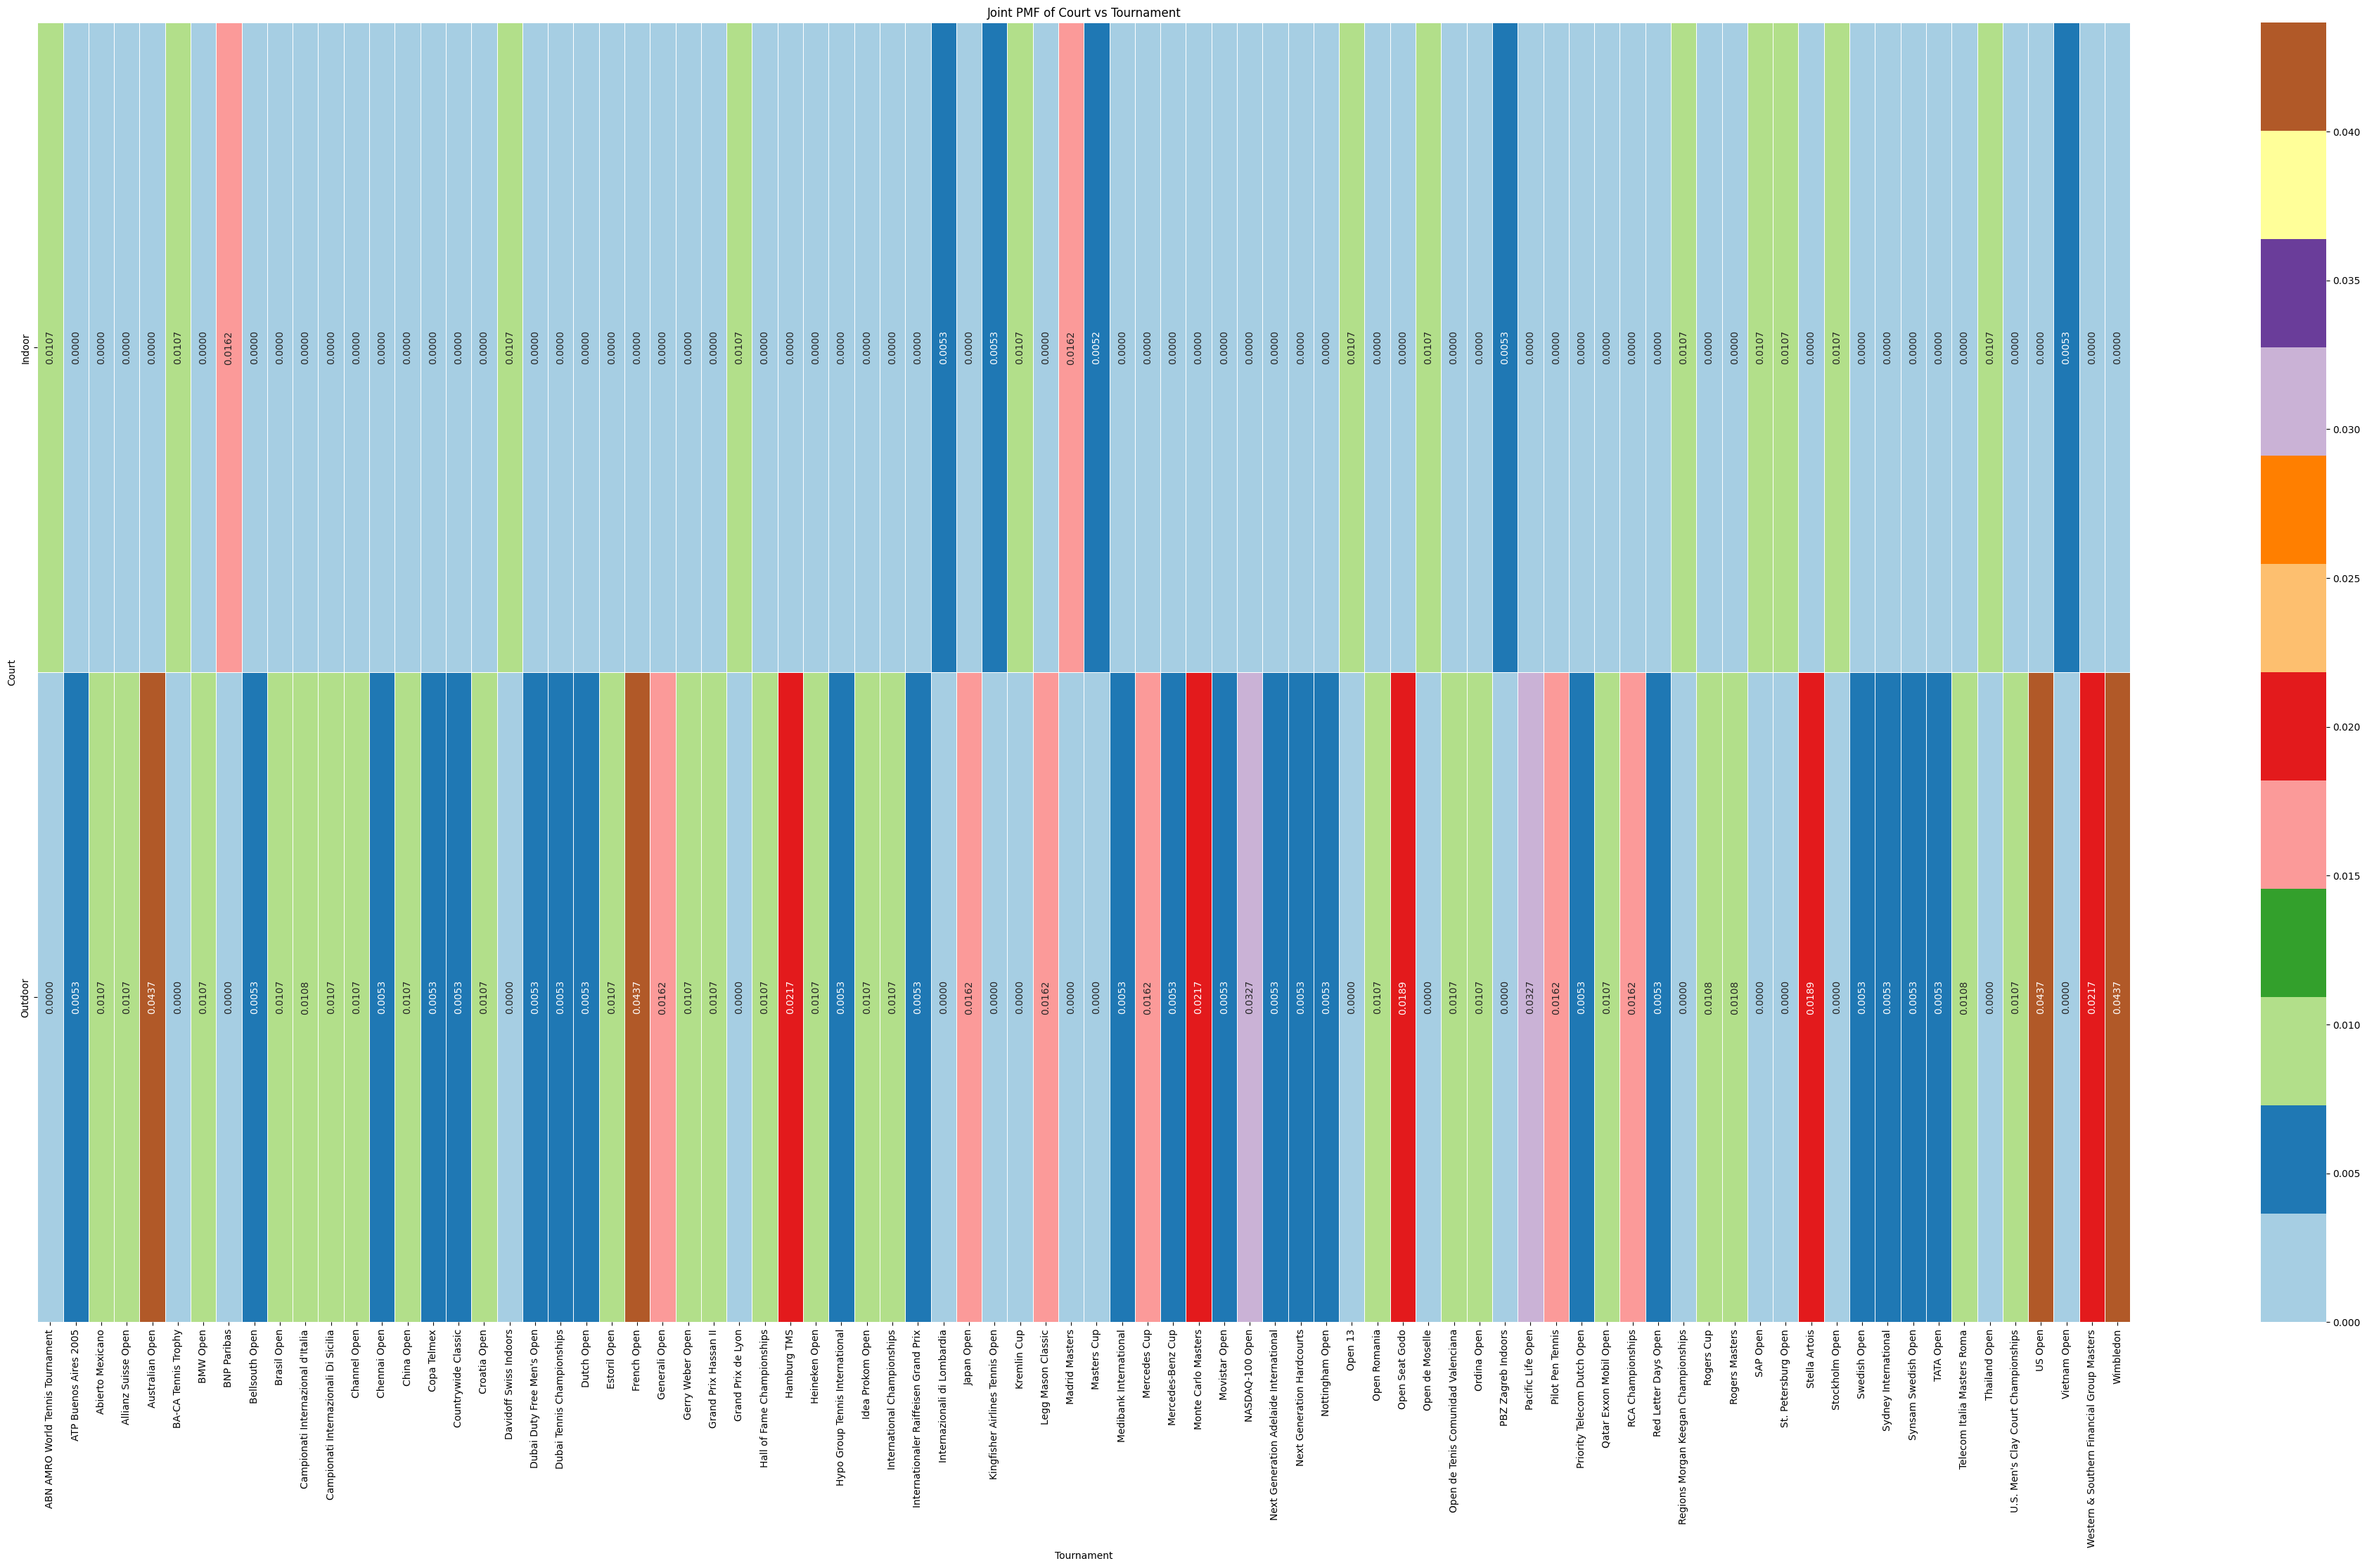

In [ ]:
df_pmf= pd.concat([df2005, df2006])

court_tournament_counts = df_pmf.groupby(['Court', 'Tournament']).size().unstack(fill_value=0)

total_matches = court_tournament_counts.values.sum()
joint_pmf = court_tournament_counts / total_matches

print("Joint Probability Mass Function of Court vs Tournament:")
print(joint_pmf)

plt.figure(figsize=(48, 24))
sns.heatmap(joint_pmf, annot=True, cmap='Paired', fmt='.4f', linewidths=.5, annot_kws={"rotation": 90})
plt.title('Joint PMF of Court vs Tournament')
plt.xlabel('Tournament')
plt.ylabel('Court')
plt.show()

**Q2. Principal Component Analysis on tennis match data from different years and visualizing it in a 3D scatter plot.**

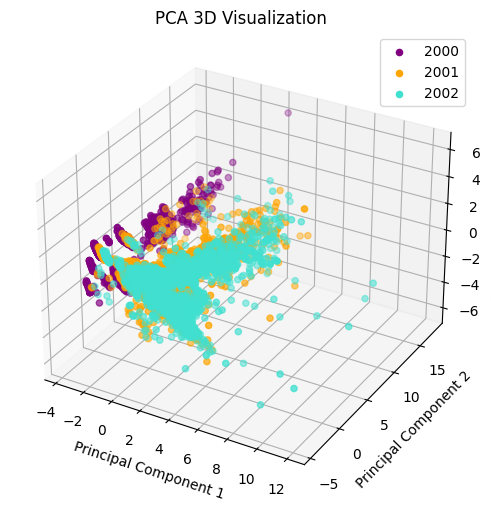

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df2000['Year'] = 2000
df2001['Year'] = 2001
df2002['Year'] = 2002
df_combined = pd.concat([df2000,df2001,df2002])

numeric_df = df_combined.select_dtypes(include='number')
numeric_df.fillna(0, inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
pca = PCA(n_components=3)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

df2000_indices = df_combined['Year'] == 2000
df2001_indices = df_combined['Year'] == 2001
df2002_indices = df_combined['Year'] == 2002

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_data[df2000_indices, 0], pca_data[df2000_indices, 1], pca_data[df2000_indices, 2],c='purple', marker='o', label='2000')
ax.scatter(pca_data[df2001_indices, 0], pca_data[df2001_indices, 1], pca_data[df2001_indices, 2],c='orange', marker='o', label='2001')
ax.scatter(pca_data[df2002_indices, 0], pca_data[df2002_indices, 1], pca_data[df2002_indices, 2],c='turquoise', marker='o', label='2002')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA 3D Visualization')
ax.legend()

plt.show()

**Q3. Countrywise distribution of players across the world.**

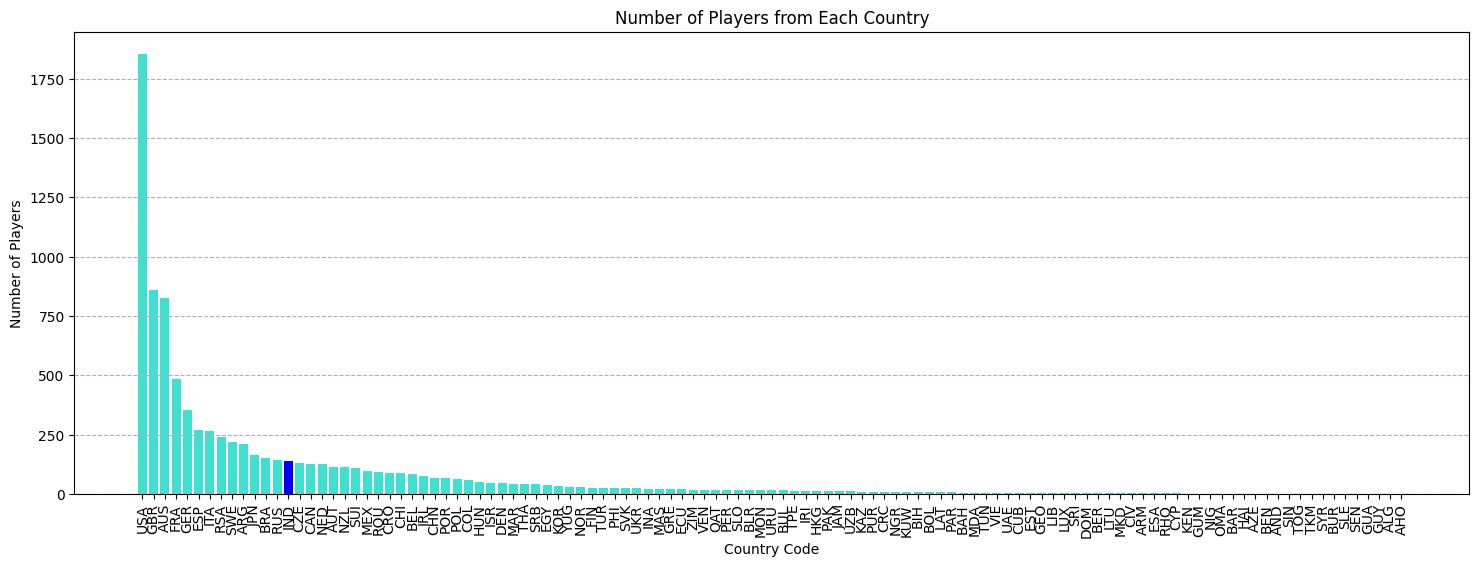

In [ ]:
country_players = dfplayers.groupby('flag_code').size().reset_index(name='count')

country_players = country_players.sort_values(by='count', ascending=False)
country_players.reset_index(drop=True, inplace=True)

colors = ["b" if country == "IND" else "turquoise" for country in country_players['flag_code']]

plt.figure(figsize=(18, 6))
plt.bar(country_players['flag_code'],country_players['count'],color=colors)
plt.xlabel('Country Code')
plt.ylabel('Number of Players')
plt.title('Number of Players from Each Country')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')
plt.show()

**Q4. Players with the worst performance each year and the number of matches they won across these 24 years.**

Year
2000        Cherkasov A.
2001       van Lottum J.
2002            Bryan B.
2003         Sirianni J.
2004           Kucera V.
2005        Fleishman Z.
2006          Armando H.
2007       Whitehouse W.
2008            Vemic D.
2009           Gaudio G.
2010      Vinciguerra A.
2011         Duclos P.L.
2012          Fischer M.
2013           Vesely J.
2014        Laaksonen H.
2015           Mektic N.
2016            Cacic N.
2017           Balazs A.
2018             Otte O.
2019          Smyczek T.
2020          Donskoy E.
2021     Seyboth Wild T.
2022           Moriya H.
2023             Bolt A.
2024    Jorda Sanchis D.
Name: Winner, dtype: object


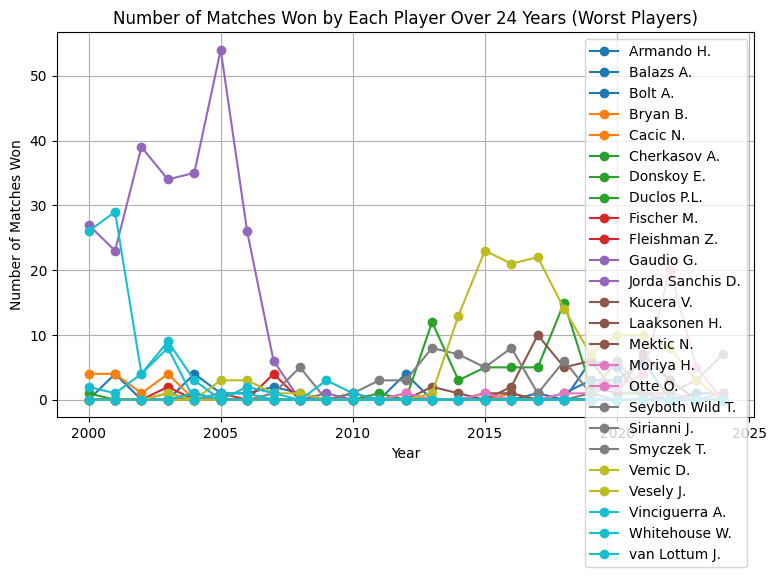

In [ ]:
df_combined['Date'] = pd.to_datetime(df_combined['Date'], format='%d/%m/%y')
df_combined['Year'] = df_combined['Date'].dt.year

worst_players = df_combined.groupby('Year')['Winner'].agg(lambda x: x.value_counts().idxmin())
print(worst_players)

matches_of_worst_players = df_combined[df_combined['Winner'].isin(worst_players)]
player_wins_each_year = matches_of_worst_players.groupby(['Year', 'Winner']).size().unstack(fill_value=0)

plt.figure(figsize=(9,5))

colors = plt.cm.tab10(np.linspace(0, 1, len(player_wins_each_year.columns)))

for i, player in enumerate(player_wins_each_year.columns):
    wins = player_wins_each_year[player]
    if wins.any():
        plt.plot(player_wins_each_year.index, wins, marker='o', color=colors[i], label=player)

plt.title('Number of Matches Won by Each Player Over 24 Years (Worst Players)')
plt.xlabel('Year')
plt.ylabel('Number of Matches Won')
plt.legend()
plt.grid(True)
plt.show()

**Q5. Covariance matrix with the betting odds (for the year 2017 and 2018).**

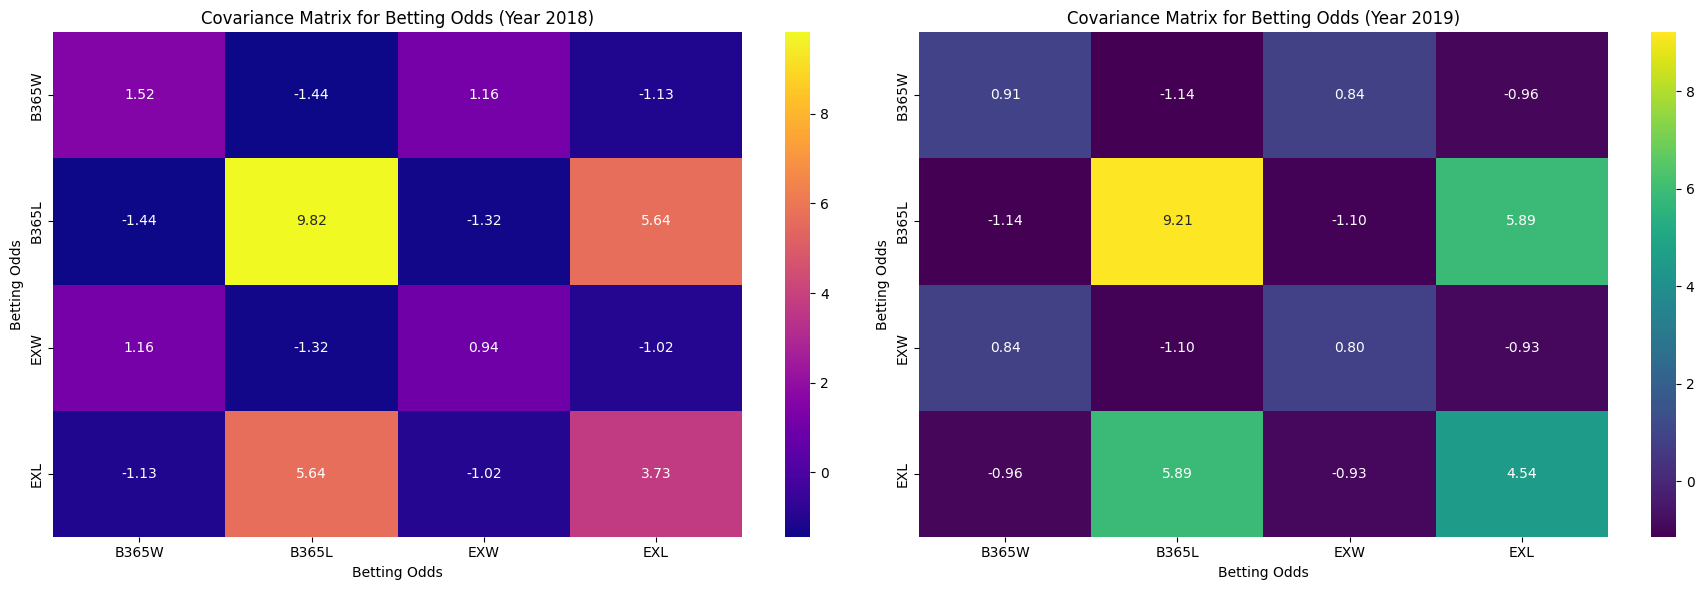

In [ ]:
covariance_matrix_2017 = df2017[['B365W', 'B365L','EXW','EXL']].cov()
covariance_matrix_2018 = df2018[['B365W', 'B365L','EXW','EXL']].cov()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(covariance_matrix_2017, annot=True, cmap='plasma', fmt=".2f", ax=axes[0])
axes[0].set_title('Covariance Matrix for Betting Odds (Year 2018)')
axes[0].set_xlabel('Betting Odds')
axes[0].set_ylabel('Betting Odds')

sns.heatmap(covariance_matrix_2018, annot=True, cmap='viridis', fmt=".2f", ax=axes[1])
axes[1].set_title('Covariance Matrix for Betting Odds (Year 2019)')
axes[1].set_xlabel('Betting Odds')
axes[1].set_ylabel('Betting Odds')

plt.tight_layout()
plt.show()


**Q6. Calculate the correlation coefficient of the winning rate and the winning points for each year.**

In [ ]:
dataframes = [df2000,df2001,df2002,df2003,df2004,df2005,df2006,df2007,df2008,df2009,df2010,df2011,df2012,df2013,df2014,df2015,df2016,df2017,df2018,df2019,df2020,df2021,df2022,df2023]  # Add all your DataFrames here

for year, df_year in zip(range(2000, 2000 + len(dataframes)), dataframes):
    if 'WRank' in df_year.columns and 'WPts' in df_year.columns:
        correlation_coefficient = df_year['WRank'].corr(df_year['WPts'])
        print(f"Correlation Coefficient for year {year}: {correlation_coefficient}")
    else:
        print(f"Columns 'WRank' and/or 'WPts' not found in the DataFrame for year {year}.")

Columns 'WRank' and/or 'WPts' not found in the DataFrame for year 2000.
Columns 'WRank' and/or 'WPts' not found in the DataFrame for year 2001.
Columns 'WRank' and/or 'WPts' not found in the DataFrame for year 2002.
Columns 'WRank' and/or 'WPts' not found in the DataFrame for year 2003.
Columns 'WRank' and/or 'WPts' not found in the DataFrame for year 2004.
Correlation Coefficient for year 2005: -0.499283024943781
Correlation Coefficient for year 2006: -0.4101973705461944
Correlation Coefficient for year 2007: -0.43889963281500316
Correlation Coefficient for year 2008: -0.43404230873074917
Correlation Coefficient for year 2009: -0.40297003061544523
Correlation Coefficient for year 2010: -0.4575113525604047
Correlation Coefficient for year 2011: -0.3878656067437486
Correlation Coefficient for year 2012: -0.42177077855310213
Correlation Coefficient for year 2013: -0.43877165686536573
Correlation Coefficient for year 2014: -0.4243487005606218
Correlation Coefficient for year 2015: -0.3835

**Q7. Find out the top three players of each tournament and the average number of matches happening in each tournamnet every season.**

Top 3 players for each tournament type (for the first 5 tournaments):
Tournament                        Winner       
AAPT Championships                Henman T.         8
                                  Martin A.         8
                                  Davydenko N.      5
ABN AMRO World Tennis Tournament  Federer R.       28
                                  Berdych T.       22
                                  Monfils G.       22
AEGON Championships               Murray A.        27
                                  Cilic M.         25
                                  Lopez F.         22
AEGON International               Seppi A.         11
                                  Istomin D.       10
                                  Lopez F.          9
AEGON Open                        Baghdatis M.      6
                                  Dolgopolov O.     6
                                  Istomin D.        6
dtype: int64


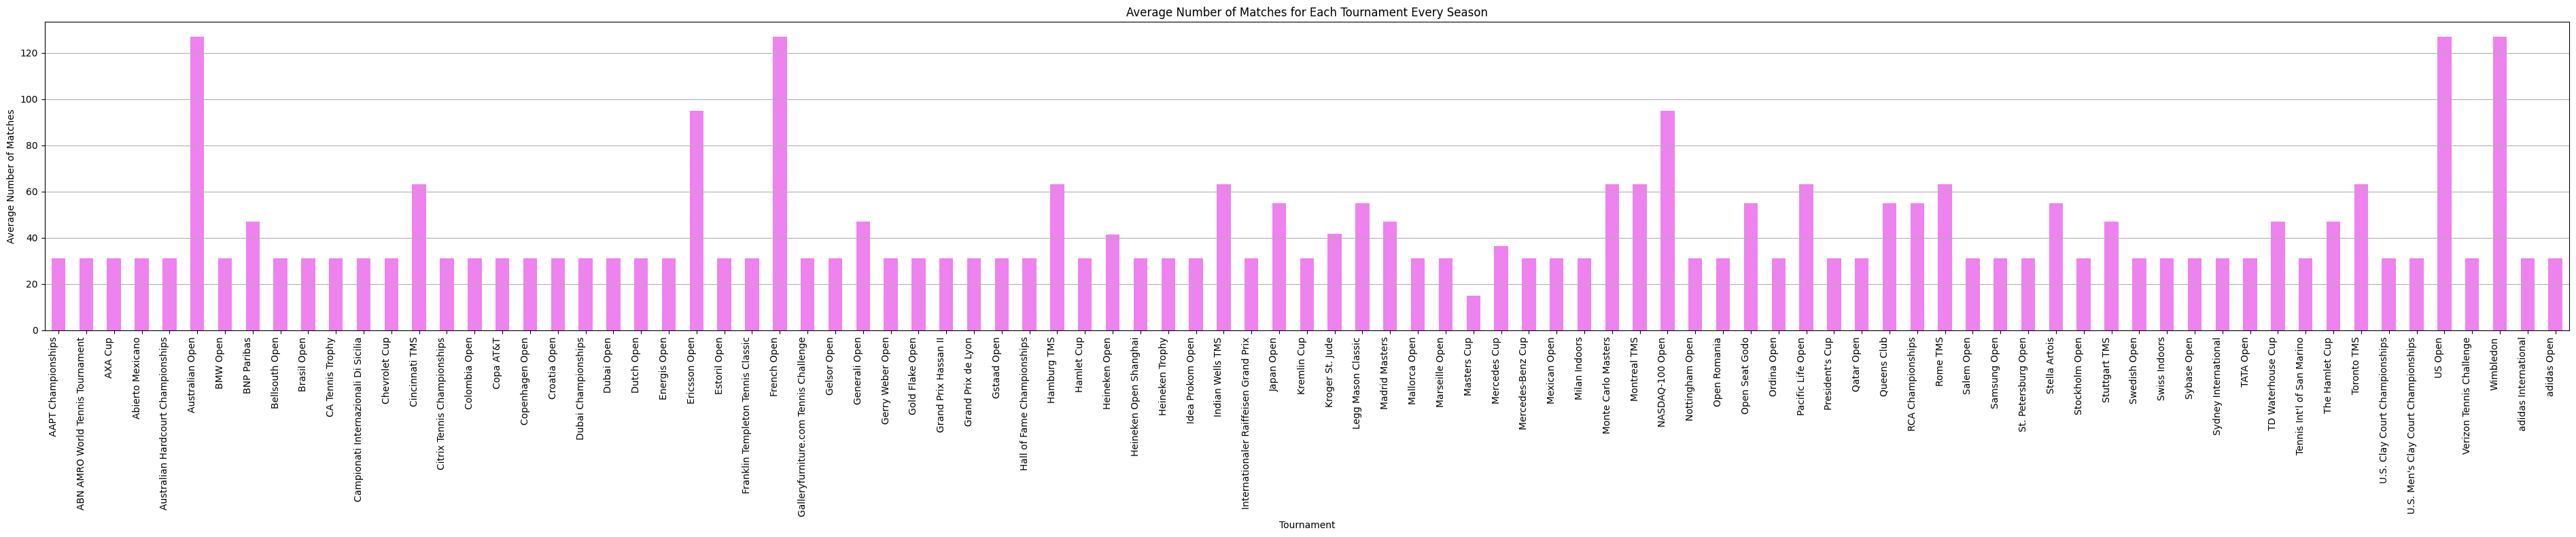

In [ ]:
top_players_by_tournament_type = df_combined.groupby(['Tournament', 'Winner']).size().groupby(level=0).nlargest(3).reset_index(level=0, drop=True)
print("Top 3 players for each tournament type (for the first 5 tournaments):")
print(top_players_by_tournament_type.head(15))

avg_matches_per_tournament = df_combined.groupby(['Tournament','Year']).size().groupby(level=0).mean()

plt.figure(figsize=(38, 8))
avg_matches_per_tournament.plot(kind='bar', color='violet')
plt.title('Average Number of Matches for Each Tournament Every Season')
plt.xlabel('Tournament')
plt.ylabel('Average Number of Matches')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Q8. Find the top ten players by win rate in indoor and outdoor matches.**

Top 10 players by win rate in Indoor matches:
Winner
Federer R.     0.021054
Djokovic N.    0.013266
Tsonga J.W.    0.011897
Monfils G.     0.011811
Simon G.       0.011554
Gasquet R.     0.011469
Murray A.      0.011383
Ljubicic I.    0.011383
Youzhny M.     0.010784
Cilic M.       0.010185
Name: count, dtype: float64

Top 10 players by win rate in Outdoor matches:
Winner
Nadal R.       0.017973
Federer R.     0.017654
Djokovic N.    0.016658
Ferrer D.      0.011400
Murray A.      0.010592
Berdych T.     0.009015
Verdasco F.    0.008752
Roddick A.     0.008677
Robredo T.     0.008658
Wawrinka S.    0.008620
Name: count, dtype: float64


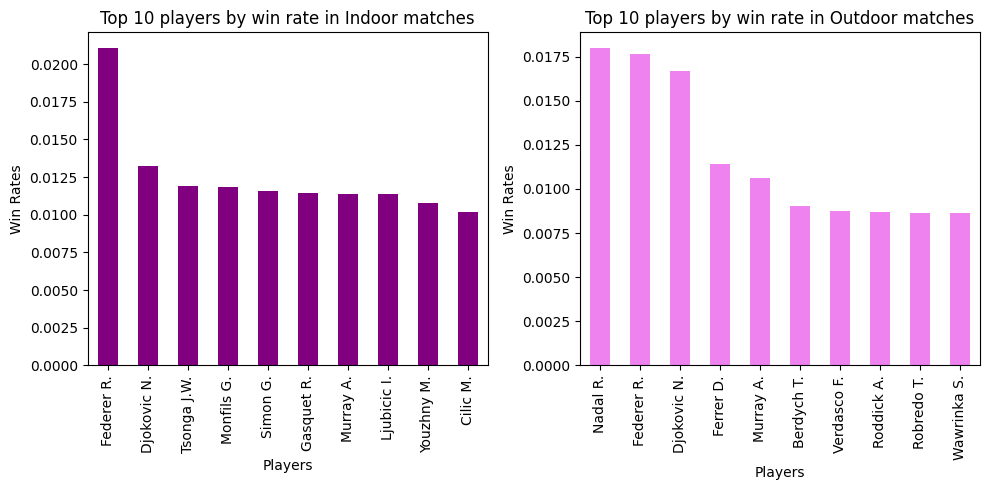

In [ ]:
matches_indoor= df_combined[df_combined['Court'].isin(['Indoor'])]
matches_outdoor= df_combined[df_combined['Court'].isin(['Outdoor'])]

player_indoor= matches_indoor['Winner'].value_counts()/len(matches_indoor)
player_outdoor= matches_outdoor['Winner'].value_counts()/len(matches_outdoor)

print('Top 10 players by win rate in Indoor matches:')
print(player_indoor.head(10))
print()
print('Top 10 players by win rate in Outdoor matches:')
print(player_outdoor.head(10))

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
(player_indoor.head(10)).plot(kind='bar',color="purple")
plt.title('Top 10 players by win rate in Indoor matches')
plt.ylabel('Win Rates')
plt.xlabel('Players')

plt.subplot(1, 2, 2)
(player_outdoor.head(10)).plot(kind='bar',color="violet")
plt.title('Top 10 players by win rate in Outdoor matches')
plt.ylabel('Win Rates')
plt.xlabel('Players')

plt.tight_layout()
plt.show()

**Q9. Calculate the correlation matrix for the match statistics for each tournament.**

In [ ]:
grouped_matches = df_combined.groupby('Tournament')
correlation_matrices = {}
for level, group in grouped_matches:
    useful_cols = ['Lsets', 'Wsets', 'WPts', 'LPts']
    corr_matrix = group[useful_cols].corr()
    correlation_matrices[level] = corr_matrix

for level, corr_matrix in correlation_matrices.items():
    print(f"\nCorrelation Matrix for Tournament Level: {level}")
    print(corr_matrix)


Correlation Matrix for Tournament Level: AAPT Championships
         Lsets    Wsets  WPts  LPts
Lsets  1.00000  0.07611   NaN   NaN
Wsets  0.07611  1.00000   NaN   NaN
WPts       NaN      NaN   NaN   NaN
LPts       NaN      NaN   NaN   NaN

Correlation Matrix for Tournament Level: ABN AMRO World Tennis Tournament
          Lsets     Wsets      WPts      LPts
Lsets  1.000000  0.059731 -0.037683  0.025184
Wsets  0.059731  1.000000 -0.015795  0.024687
WPts  -0.037683 -0.015795  1.000000  0.054476
LPts   0.025184  0.024687  0.054476  1.000000

Correlation Matrix for Tournament Level: AEGON Championships
          Lsets     Wsets      WPts      LPts
Lsets  1.000000  0.057055 -0.025058  0.108720
Wsets  0.057055  1.000000  0.012751 -0.017315
WPts  -0.025058  0.012751  1.000000  0.033349
LPts   0.108720 -0.017315  0.033349  1.000000

Correlation Matrix for Tournament Level: AEGON International
          Lsets     Wsets      WPts      LPts
Lsets  1.000000  0.021732 -0.050342 -0.043262
Wsets  0

**Q10. The probability of winning for the top 3 players on different surfaces.**

<ipython-input-107-0971bf7b8e3e>:19: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(data=winning_prob_df, x='Player', y='Winning_Probability', hue='Surface',palette=sns.color_palette("plasma"))


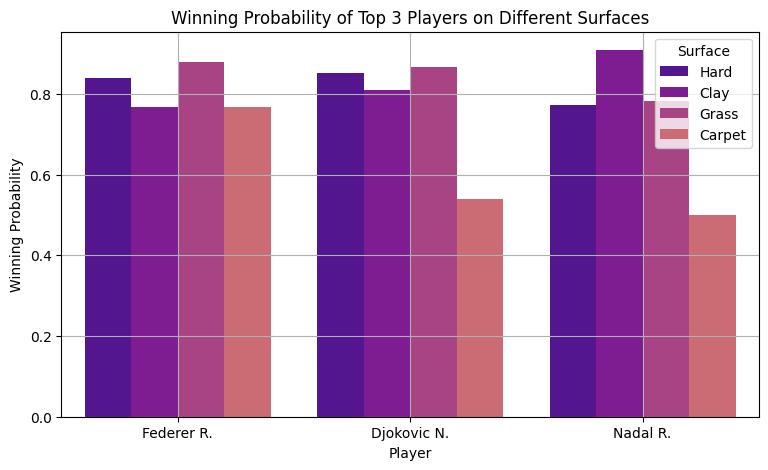

In [ ]:
player_wins = df_combined['Winner'].value_counts()
top_3_players = player_wins.head(3).index.tolist()

winning_probabilities = []
for player in top_3_players:
    player_matches = df_combined[(df_combined['Winner'] == player) | (df_combined['Loser'] == player)]
    total_matches_per_surface = player_matches['Surface'].value_counts()
    wins_per_surface = player_matches[player_matches['Winner'] == player]['Surface'].value_counts()
    win_probability_per_surface = wins_per_surface / total_matches_per_surface
    for surface, probability in win_probability_per_surface.items():
        winning_probabilities.append({
            'Player': player,
            'Surface': surface,
            'Winning_Probability': probability
        })
winning_prob_df = pd.DataFrame(winning_probabilities)

plt.figure(figsize=(9,5))
sns.barplot(data=winning_prob_df, x='Player', y='Winning_Probability', hue='Surface',palette=sns.color_palette("plasma"))
plt.title("Winning Probability of Top 3 Players on Different Surfaces")
plt.xlabel("Player")
plt.ylabel("Winning Probability")
plt.grid()
plt.show()